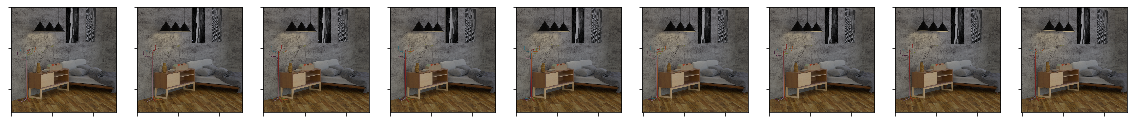

<Figure size 1440x12960 with 0 Axes>

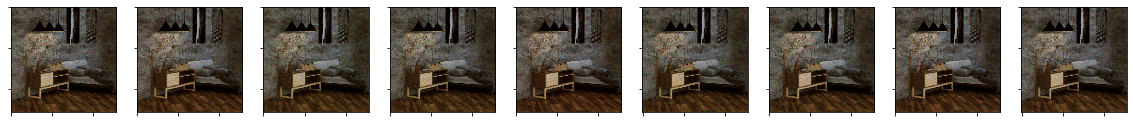

In [3]:
import os
from dataloaders import hci4d
import numpy as np
from utils import show_scene, show_view_sequence
from matplotlib import pyplot as plt
from PIL import Image

DATA_ROOT = os.path.join('data', 'SyntheticLightfieldData')
RESULTS_ROOT = 'results'
test_set = hci4d.HCI4D(os.path.join(DATA_ROOT, 'test'))

h_views, v_views, i_views, d_views, center, gt, mask, index = test_set.load_scene(0)    
show_view_sequence(d_views)
plt.figure(figsize=(20, 20*9))
pred_views = np.zeros((9, 512, 512, 3)).astype(np.int32)
for i in range(9):
    img = Image.open(os.path.join(RESULTS_ROOT, "pred{0}.png".format(i)))
    pred_views[i] = np.array(img)
show_view_sequence(pred_views)

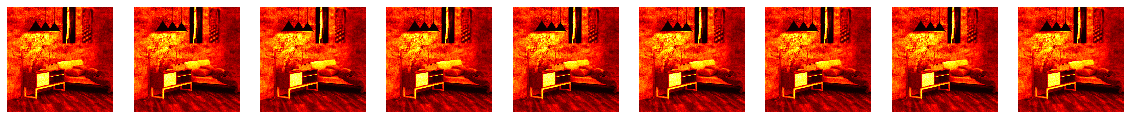

In [11]:
pred_mean = np.mean(pred_views, axis=3)
gt_mean = np.mean(d_views, axis=1)

heatmap = np.abs(gt_mean - pred_mean)
plt.figure(figsize=(20, 20*9))
for i in range(9):
    plt.subplot(191+i) 
    plt.imshow(heatmap[i], cmap='hot')
    plt.axis('off')
plt.show()
    